In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from texthero import preprocessing
import texthero as hero
import seaborn as sns

In [2]:
df = pd.read_csv("emotion_dataset_raw.csv")
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [3]:
df.shape

(34792, 2)

In [4]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [5]:
custom_pipeline = [
    preprocessing.fillna,
    preprocessing.lowercase, 
    preprocessing.remove_digits, 
    preprocessing.remove_punctuation, 
    preprocessing.remove_diacritics, 
    preprocessing.remove_stopwords, 
    preprocessing.remove_whitespace,
]

In [6]:
df_text_clean = df["Text"].pipe(hero.clean, custom_pipeline)
df_text_clean.head()

0                                                     
1                       sage act upgrade list tommorow
2    way homegirl baby funeral man hate funerals re...
3    eye true hazel eye brilliant regular features ...
4    iluvmiasantos ugh babe hugggzzz u babe naamaze...
Name: Text, dtype: object

In [7]:
final_stopwords_list = stopwords.words('english') + stopwords.words('french')
X_stopwords = hero.remove_stopwords(df_text_clean, final_stopwords_list)
df_final_clean = hero.stem(X_stopwords, stem="porter", language="english")
df_final_clean

0                                                         
1                            sage act upgrad list tommorow
2        way homegirl babi funer man hate funer realli ...
3        eye true hazel eye brilliant regular featur op...
4        iluvmiasanto ugh babe hugggzzz u babe naamaz n...
                               ...                        
34787    michelgw gift hope like hand made wear keep wa...
34788         world didnt give world definit cnt take away
34789                                        man rob today
34790                         youu call jealousi call lose
34791                                think babi dream time
Name: Text, Length: 34792, dtype: object

In [ ]:
hero.

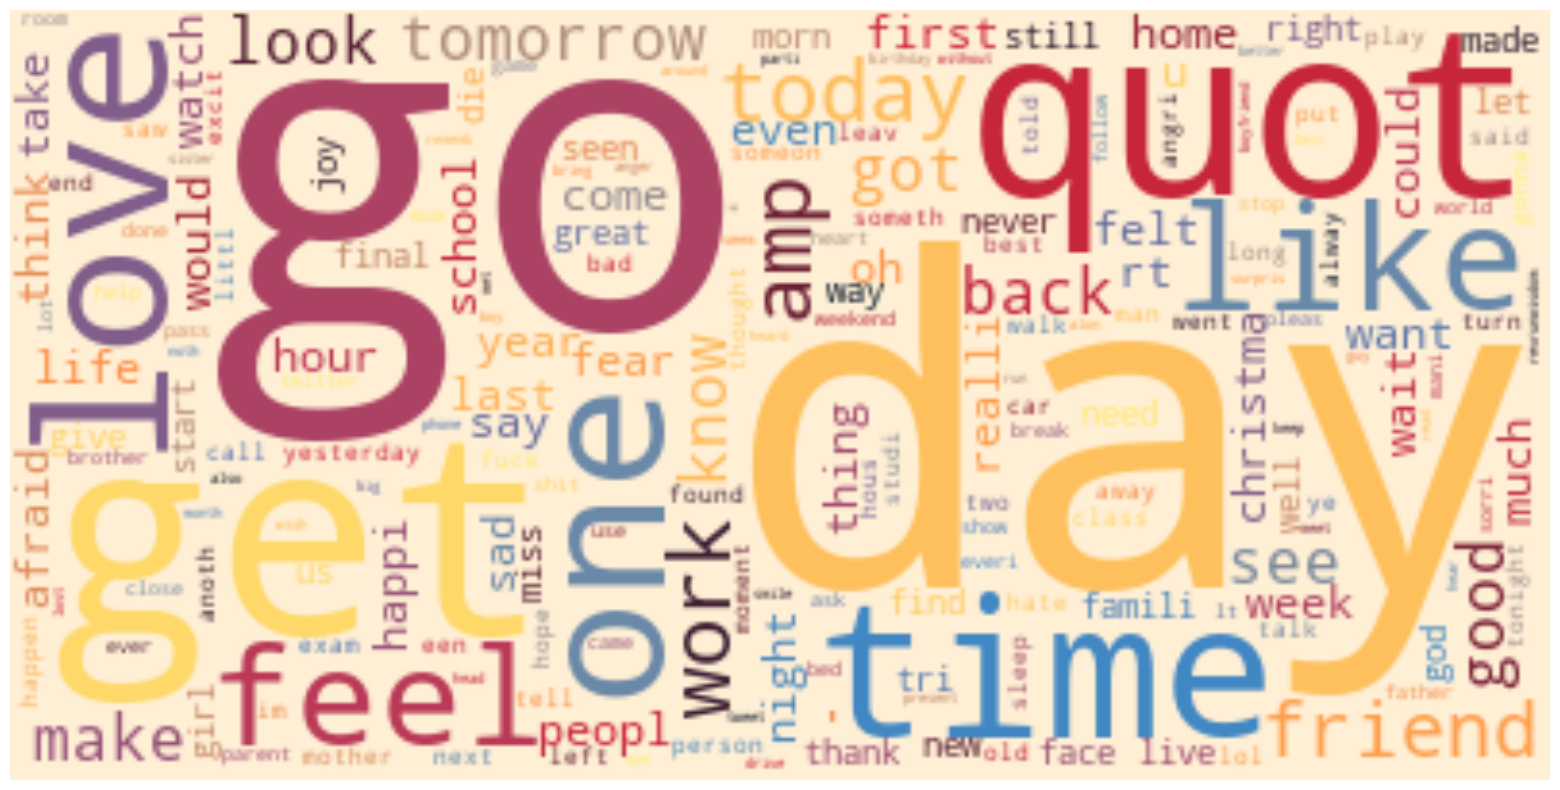

In [8]:
hero.wordcloud(df_final_clean);

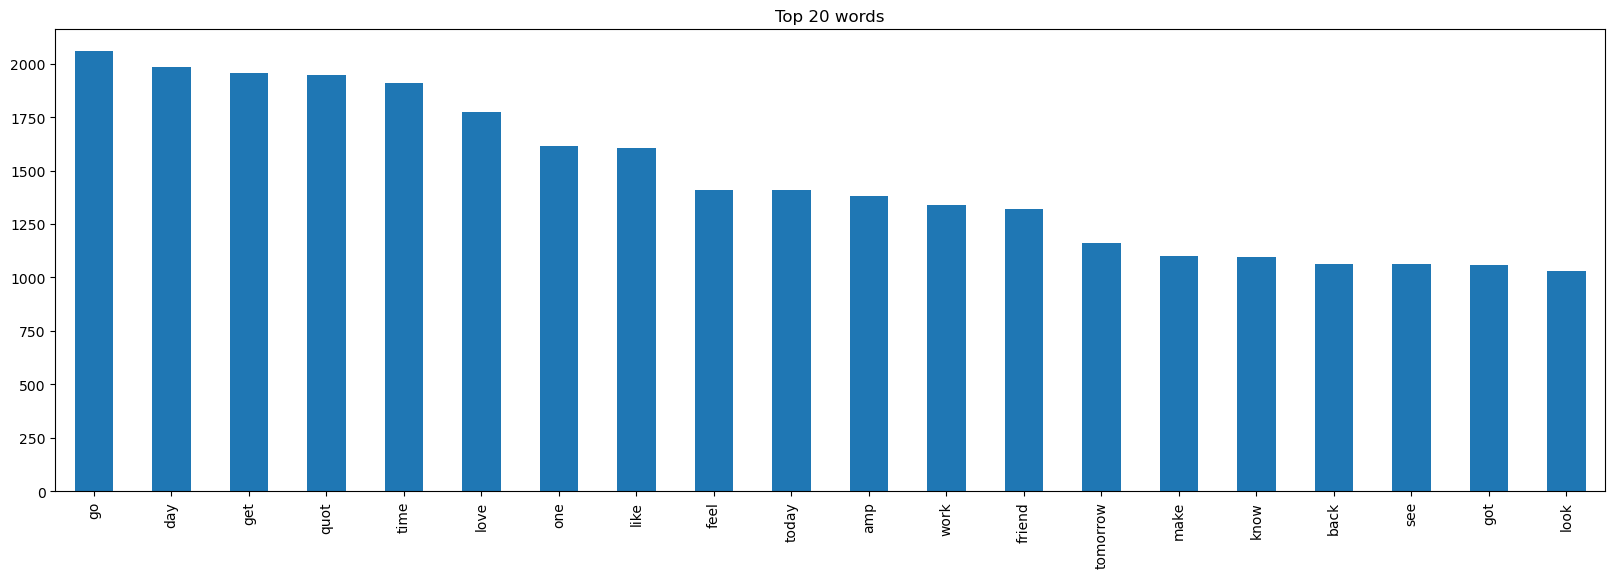

In [9]:
plt.figure(figsize=(20, 6))
NUM_TOP_WORDS = 20
viz_top_words = hero.visualization.top_words(df_final_clean).head(NUM_TOP_WORDS)
viz_top_words.plot.bar(title="Top 20 words");

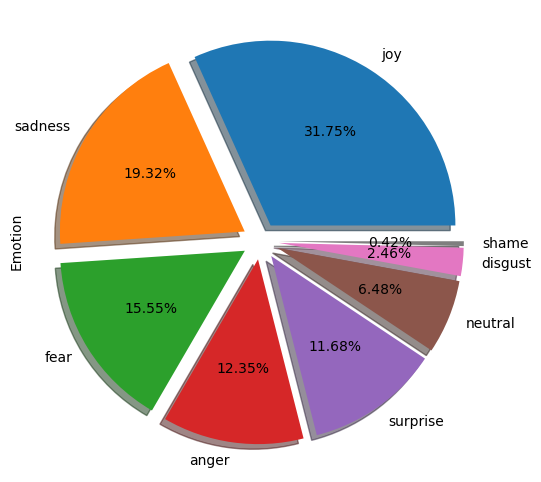

In [10]:
plt.figure(figsize=(7, 6))
df["Emotion"].value_counts().plot.pie(autopct="%.2f%%", shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]);

In [11]:
df_tokens = hero.tokenize(df_final_clean)

In [12]:
df_tokens

0                                                       []
1                      [sage, act, upgrad, list, tommorow]
2        [way, homegirl, babi, funer, man, hate, funer,...
3        [eye, true, hazel, eye, brilliant, regular, fe...
4        [iluvmiasanto, ugh, babe, hugggzzz, u, babe, n...
                               ...                        
34787    [michelgw, gift, hope, like, hand, made, wear,...
34788    [world, didnt, give, world, definit, cnt, take...
34789                                    [man, rob, today]
34790                   [youu, call, jealousi, call, lose]
34791                           [think, babi, dream, time]
Name: Text, Length: 34792, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC

In [14]:
Y = df["Emotion"].astype('category').cat.codes
Y

0        4
1        3
2        5
3        3
4        3
        ..
34787    7
34788    3
34789    0
34790    2
34791    5
Length: 34792, dtype: int8

In [15]:
encoder = LabelEncoder()
y = encoder.fit_transform(df["Emotion"])
y.shape, y

((34792,), array([4, 3, 5, ..., 0, 2, 5]))

In [16]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7}

In [17]:
extraction = CountVectorizer()
X = extraction.fit_transform(df_final_clean)
X

<34792x29309 sparse matrix of type '<class 'numpy.int64'>'
	with 277405 stored elements in Compressed Sparse Row format>

In [18]:
X.shape

(34792, 29309)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1234, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33558, 29309), (1234, 29309), (33558,), (1234,))

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dropout, Flatten, Dense, LSTM

In [24]:
model = Sequential()
model.add(Embedding(1000, 64))
model.add(LSTM(64, return_sequences=True))
mode.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(7, activation="sigmoid"))

In [56]:
y_pred = model.predict(X_test)
y_pred

array([0, 3, 3, ..., 3, 0, 3])

In [57]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.55      0.56      0.55       153
           1       0.88      0.18      0.30        39
           2       0.68      0.69      0.68       181
           3       0.62      0.79      0.70       400
           4       0.72      0.73      0.73        79
           5       0.60      0.50      0.55       224
           6       1.00      0.75      0.86         4
           7       0.65      0.46      0.54       154

    accuracy                           0.63      1234
   macro avg       0.71      0.58      0.61      1234
weighted avg       0.64      0.63      0.62      1234



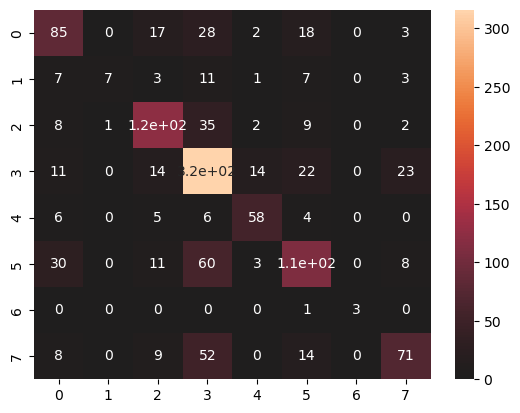

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, center=True);

In [111]:
classes = list(set(df["Emotion"]))
classes_test = list(set(y_test.astype(int)))

In [ ]:
def prediction(model, text):
    return model.predict(text).flatten()

text = list(input("Text: "))

input_text = extraction.transform(text)
pred = prediction(model, input_text)

if pred == 0:
    print("anger")
elif pred == 1:
    print("disgust")
elif pred == 2:
    print('fear')
elif pred == 3:
    print('joy')
elif pred == 4:
    print('neutral')
elif pred == 5:
    print('sadness')
elif pred == 6:
    print('shame')
elif pred == 7:
    print('surprise')